## Load of Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_name = f'covid-19_in_seoul_7_19_.csv'
file_name

'covid-19_in_seoul_7_19_.csv'

In [3]:
df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(1477, 7)

In [4]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1477,13769,7.19.,강서구,-,확인 중,-
1,1476,13758,7.19.,성북구,-,확인 중,서울의료원
2,1475,13761,7.19.,서대문구,인도네시아,해외 접촉 추정,서남병원
3,1474,13729,7.18.,관악구,-,중구 한화생명 관련,보라매병원
4,1473,13734,7.18.,관악구,-,중구 한화생명 관련,보라매병원


In [5]:
# change columns name to english
df.columns = ['index', 'patient', 'confirmed_date', 'resident', 'travel_hist', 'contact_hist', 'action']

In [6]:
df.head()

,index,patient,confirmed_date,resident,travel_hist,contact_hist,action
0,1477,13769,7.19.,강서구,-,확인 중,-
1,1476,13758,7.19.,성북구,-,확인 중,서울의료원
2,1475,13761,7.19.,서대문구,인도네시아,해외 접촉 추정,서남병원
3,1474,13729,7.18.,관악구,-,중구 한화생명 관련,보라매병원
4,1473,13734,7.18.,관악구,-,중구 한화생명 관련,보라매병원


In [7]:
# now, index is descending
# change index order by ascending
df.sort_values(by='index', ascending=True, inplace=True)
df.head()

,index,patient,confirmed_date,resident,travel_hist,contact_hist,action
1476,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)
1475,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1474,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1473,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1472,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)


In [8]:
df.tail()

,index,patient,confirmed_date,resident,travel_hist,contact_hist,action
4,1473,13734,7.18.,관악구,-,중구 한화생명 관련,보라매병원
3,1474,13729,7.18.,관악구,-,중구 한화생명 관련,보라매병원
2,1475,13761,7.19.,서대문구,인도네시아,해외 접촉 추정,서남병원
1,1476,13758,7.19.,성북구,-,확인 중,서울의료원
0,1477,13769,7.19.,강서구,-,확인 중,-


## Visualization

In [9]:
import matplotlib.pyplot as plt

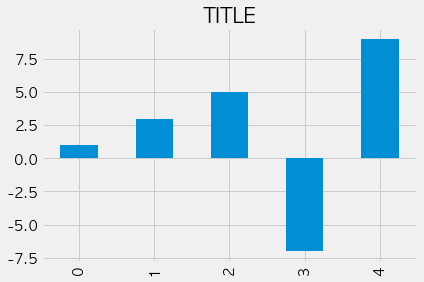

In [10]:
# graph pre-check
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="TITLE")

In [11]:
# display graph clearly by retina support
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

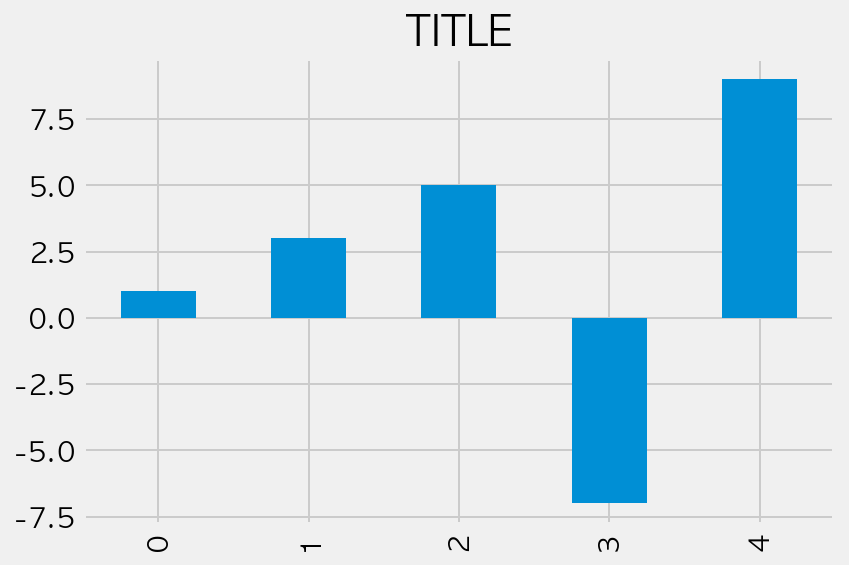

In [12]:
pd.Series([1, 3, 5, -7, 9]).plot.bar(title="TITLE")

In [13]:
# Number of confirmed persons by date
df['confirmed_date'].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
5.01.     1
4.20.     1
3.5.      1
4.30.     1
5.31.     1
Name: confirmed_date, Length: 150, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1476 to 0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1477 non-null   int64 
 1   patient         1477 non-null   int64 
 2   confirmed_date  1477 non-null   object
 3   resident        1477 non-null   object
 4   travel_hist     1477 non-null   object
 5   contact_hist    1477 non-null   object
 6   action          1477 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.3+ KB


In [15]:
# Confirmed Date is Object type.
# Change to_datetime type
df['confirmed_date'] = pd.to_datetime('2020-'+df['confirmed_date'].str.replace('.', '-', n=1).str.replace('.',''))
df['confirmed_date']

1476   2020-01-24
1475   2020-01-30
1474   2020-01-30
1473   2020-01-30
1472   2020-01-31
          ...    
4      2020-07-18
3      2020-07-18
2      2020-07-19
1      2020-07-19
0      2020-07-19
Name: confirmed_date, Length: 1477, dtype: datetime64[ns]

In [16]:
df.head()

,index,patient,confirmed_date,resident,travel_hist,contact_hist,action
1476,1,2,2020-01-24,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)
1475,2,5,2020-01-30,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1474,3,6,2020-01-30,종로구,-,#3 접촉,서울대학교병원(퇴원)
1473,4,7,2020-01-30,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1472,5,9,2020-01-31,성북구,-,#5 접촉,서울의료원(퇴원)


In [17]:
# The month of datetime
df['month'] = df['confirmed_date'].dt.month
df.head()

,index,patient,confirmed_date,resident,travel_hist,contact_hist,action,month
1476,1,2,2020-01-24,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),1
1475,2,5,2020-01-30,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),1
1474,3,6,2020-01-30,종로구,-,#3 접촉,서울대학교병원(퇴원),1
1473,4,7,2020-01-30,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),1
1472,5,9,2020-01-31,성북구,-,#5 접촉,서울의료원(퇴원),1


In [18]:
# The week of datetime
df['week'] = df['confirmed_date'].dt.week
df.head()

,index,patient,confirmed_date,resident,travel_hist,contact_hist,action,month,week
1476,1,2,2020-01-24,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),1,4
1475,2,5,2020-01-30,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),1,5
1474,3,6,2020-01-30,종로구,-,#3 접촉,서울대학교병원(퇴원),1,5
1473,4,7,2020-01-30,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),1,5
1472,5,9,2020-01-31,성북구,-,#5 접촉,서울의료원(퇴원),1,5


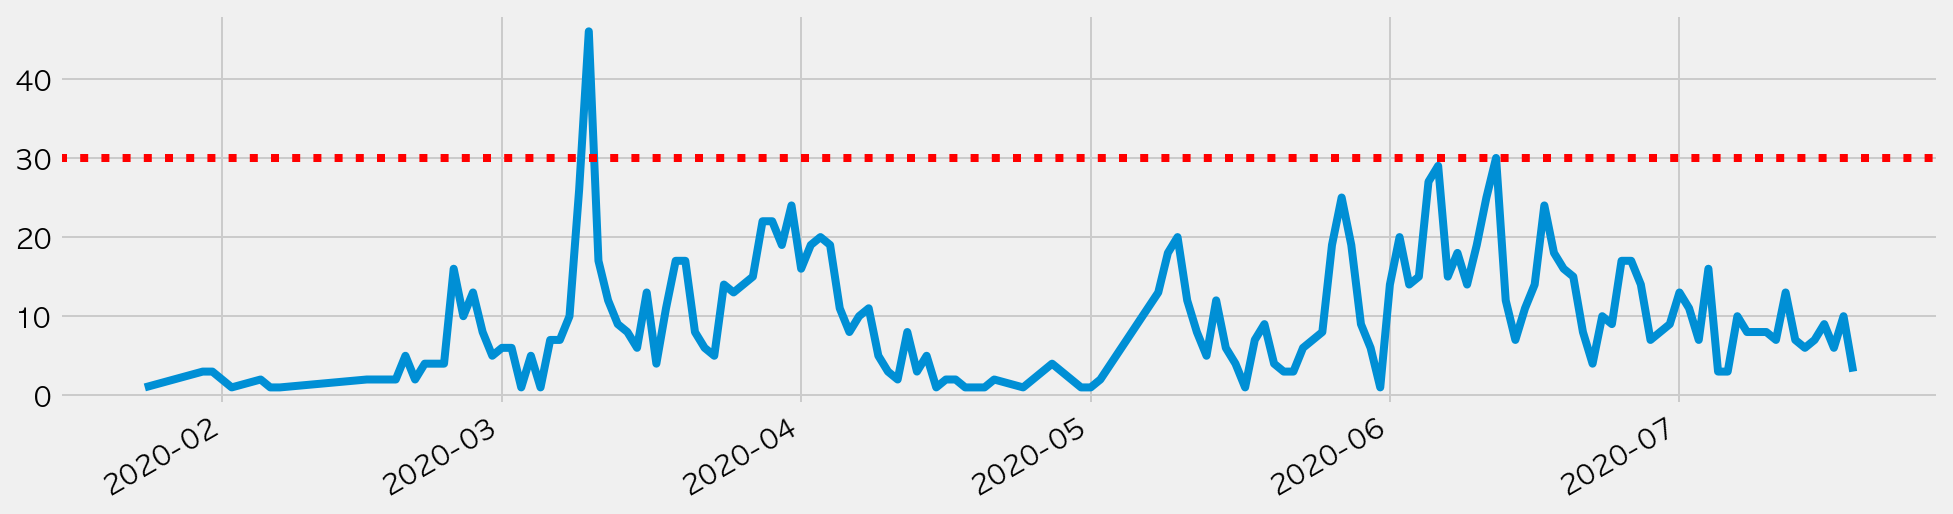

In [19]:
# Line graph (x = confirmed_date, y = number of patient)
df['confirmed_date'].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(30, color='red', ls=':')
#plt.legend(['','avg'])

In [20]:
df['confirmed_month_day'] = df['confirmed_date'].astype(str).map(lambda x : x[-5:])

In [21]:
!pwd

/Users/lhs/PycharmProjects/PythonDataScienceExam/Covid-19_in_Seoul


In [22]:
!cd ..
!pwd

/Users/lhs/PycharmProjects/PythonDataScienceExam/Covid-19_in_Seoul
